## Sara nr labb 2

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so
import chart_studio.plotly as py
import plotly.graph_objects as go
import chart_studio as cs
cs.tools.set_credentials_file(username='Sara_Mellgren', api_key='dpvja4uzxx')
from pandas import DataFrame
na_filter=False # Filter detect missing value markers



* Start by reading the file riket2023_åk9_np.xlsx and sheets for the various subjects. Change the column names on
* respective dataframe and cleaning from null. The info i find i LP


In [113]:
class DataReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_data(self, sheet_name):
        df = pd.read_excel(self.file_path, sheet_name=sheet_name)
        df.columns = ["plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", 
                      "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", 
                      "Flickor (poäng)", "Pojkar (poäng)"]
        df = df.dropna()
        return df

# Skapa en instans av DataReader-klassen med filvägen till Excel-filen
data_reader = DataReader("riket2023_åk9_np.xlsx")

# Använd metoden för att läsa in data från olika ark
df_matematik = data_reader.read_data("Matematik")
df_engelska = data_reader.read_data("Engelska")
df_svenska = data_reader.read_data("Svenska")
df_svenska_som_andrspåk = data_reader.read_data("Svenska som andraspråk")   
df_matematik

,plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
9,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
10,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
11,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


 Get the number of student who got F in math

* Find out the total number of F's in math, boys and girls respectively.

I learned how important it is to keep track of the correct index in order to calculate the correct value. I learned a lot from this website.https://pandas.pydata.org/docs/user_guide/indexing.html#looking-up-values-by-index-column-labels

In [122]:
# Beräkna antalet flickor och pojkar som fått F i matematik #Obs denna formlen beräknar fel det ska vara 5824,92 som får F i matematik
flickor_f_matematik = df_matematik.iloc[1]["Flickor (A-F)"]-round(df_matematik.iloc[1]["Flickor (A-F)"] * df_matematik.iloc[1]["Flickor (A-E)"]/100) 

#pojkar som har fått F i matematik
pojkar_f_matematik = df_matematik.iloc[1]["Pojkar (A-F)"] - round(df_matematik.iloc[1]["Pojkar (A-E)"] * df_matematik.iloc[1]["Pojkar (A-F)"]/100) 

#totalt antal elever som fick F
totalt_f_matematik = round(flickor_f_matematik + pojkar_f_matematik)

print(f"Totalt antal flickor som fick F var: {flickor_f_matematik}")
print(f"Totalt antal pojkar som fick F var: {pojkar_f_matematik}")
print(f"Totalt antal elever som fick F var: {totalt_f_matematik}")

Totalt antal flickor som fick F var: 5825
Totalt antal pojkar som fick F var: 5798
Totalt antal elever som fick F var: 11623


Antal flickor som har fått F i matematik:  5825 st
Antal pojkar som har fått F i matematik  5798 st
Totalt antal elever som har fått F i matematik:  11623 st


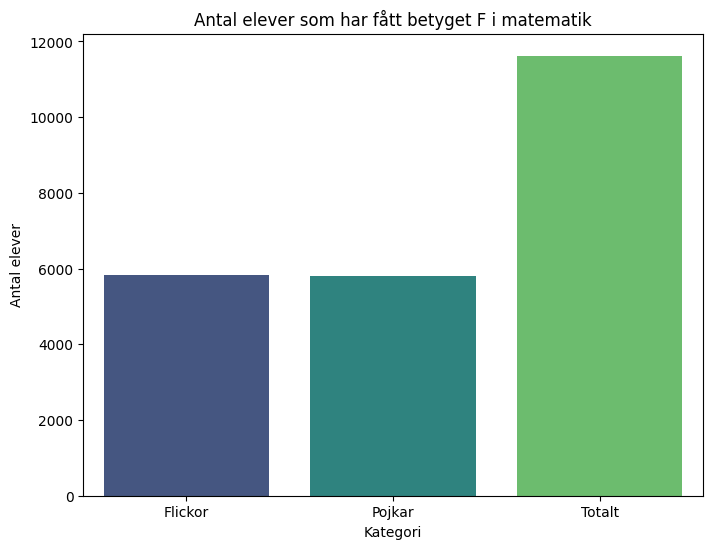

<Figure size 640x480 with 0 Axes>

In [115]:

print("Antal flickor som har fått F i matematik: ", flickor_f_matematik ,("st"))
print("Antal pojkar som har fått F i matematik " , pojkar_f_matematik ,("st"))
print("Totalt antal elever som har fått F i matematik: ", totalt_f_matematik, ("st"))

data = {
    "Kategori": ["Flickor", "Pojkar", "Totalt"],
    "Antal": [flickor_f_matematik, pojkar_f_matematik, totalt_f_matematik]
}
df_visualisering = pd.DataFrame(data)

# Skapa ett barplot med Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="Kategori", y="Antal", data=df_visualisering, hue="Kategori", palette="viridis", legend=False)
plt.title("Antal elever som har fått betyget F i matematik")
plt.xlabel("Kategori")
plt.ylabel("Antal elever")
plt.show()

plt.savefig('Antal elever som har fått betyget F i matematik.png')

Draw a bar graph of the total points for the different subjects.

# Skapa grafer för varje enskild huvudman 

Jag insåg att när jag skapade beräkningen för skolverket poäng så fick jag felmedelande för att ".." finns med i beräkningen på svenska som andra spårk. Så jag skapar en metod för att omvandla ".." till 0  

In [116]:
# Funktion för att tolka ".." 
def interpret_value(value):
    if isinstance(value, str) and value.startswith(".."):
        return 0
   

Titel: Betygsgenomsnittspoäng per huvudman. Jag lägger ihop de olika betygspoängen för att kunna skapa en graf. 

In [117]:
#Titel: Betygsgenomsnittspoäng per huvudman
samtliga_poäng = interpret_value(df_engelska.iloc[1]["Totalt (poäng)"]+ df_matematik.iloc[1]["Totalt (poäng)"] + df_svenska.iloc[1]["Totalt (poäng)"] + df_svenska_som_andrspåk.iloc[1]["Totalt (poäng)"])
kommunal_poäng = interpret_value(df_engelska.iloc[2]["Totalt (poäng)"]+ df_matematik.iloc[2]["Totalt (poäng)"] + df_svenska.iloc[2]["Totalt (poäng)"] + df_svenska_som_andrspåk.iloc[2]["Totalt (poäng)"])
enskilda_poäng = interpret_value(df_engelska.iloc[3]["Totalt (poäng)"]+ df_matematik.iloc[3]["Totalt (poäng)"] + df_svenska.iloc[3]["Totalt (poäng)"] + df_svenska_som_andrspåk.iloc[3]["Totalt (poäng)"])
skolverket_poäng = df_engelska.iloc[4]["Totalt (poäng)"]+ df_matematik.iloc[4]["Totalt (poäng)"] + df_svenska.iloc[4]["Totalt (poäng)"] + interpret_value(df_svenska_som_andrspåk.iloc[4]["Totalt (poäng)"])
samtliga_poäng

ValueError: Could not interpret value `Samtliga` for `x`. An entry with this name does not appear in `data`.

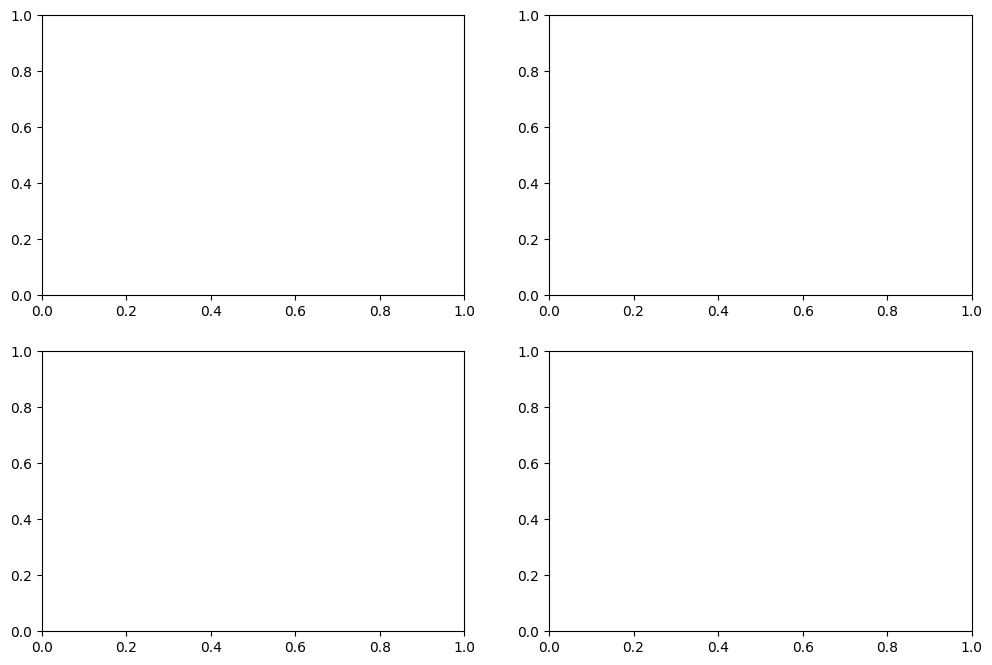

In [118]:
#Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

# visualization using seaborn
fig, axes = plt.subplots(2,2, figsize= (12,8))

titles = ["Engelska", "Svenska", "Matematik", "Svenska_som_andrspåk"]
data_frames = [df_matematik, df_engelska, df_svenska, df_svenska_som_andrspåk]
data = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andrspåk]   
}

x_columns = ["Samtliga","Kommunal", "Enskild", "Skolverket"] 

for ax, data, title, x_column in zip(axes, data_frames, titles, x_columns): 
    sns.barplot(data=data, x=x_column, y="Totalt poäng per huvudman och ämne", ax=ax)
    ax.set(title=title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig("figures/Totalt poäng per huvudman och ämne.png", facecolor="white", bbox_inches="tight")
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

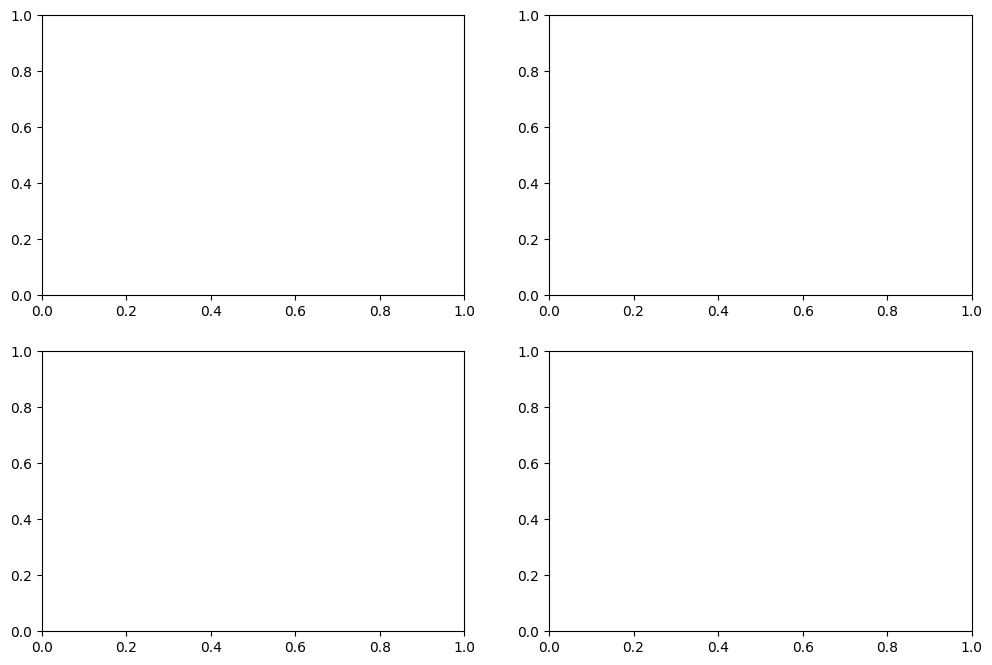

In [ ]:


data = {
    "Matematik": df_matematik,
    "Engelska": df_engelska,
    "Svenska": df_svenska, 
    "Svenska som andraspråk": df_svenska_som_andraspråk 
}


fig, axes = plt.subplots(2,2, figsize= (12,8))
subjects = list(data.keys())

for i, subject in enumerate(subjects):
    ax = axes[i//2, i%2]
    df =data[subject]
    ax.bar(df.index, df["Totalt (poäng)"], color='skyblue')
    ax.set_title(f'Totalt poäng för {subject}')
    ax.set_xlabel('Huvudman')
    ax.set_ylabel('Totalt poäng')
    ax.tick_params(axis= 'x', rotation= 45)

# Assuming data is a dictionary where each value is a list containing a DataFrame as the first element
#df = data[subject][0]  # Accessing the DataFrame from the list

# Now you can access columns from the DataFrame
#ax.bar(df["Huvudman"], df["Totalt (poäng)"], color='skyblue') 
plt.tight_layout()
#plt.savefig('visualiseringar/total')
plt.show()

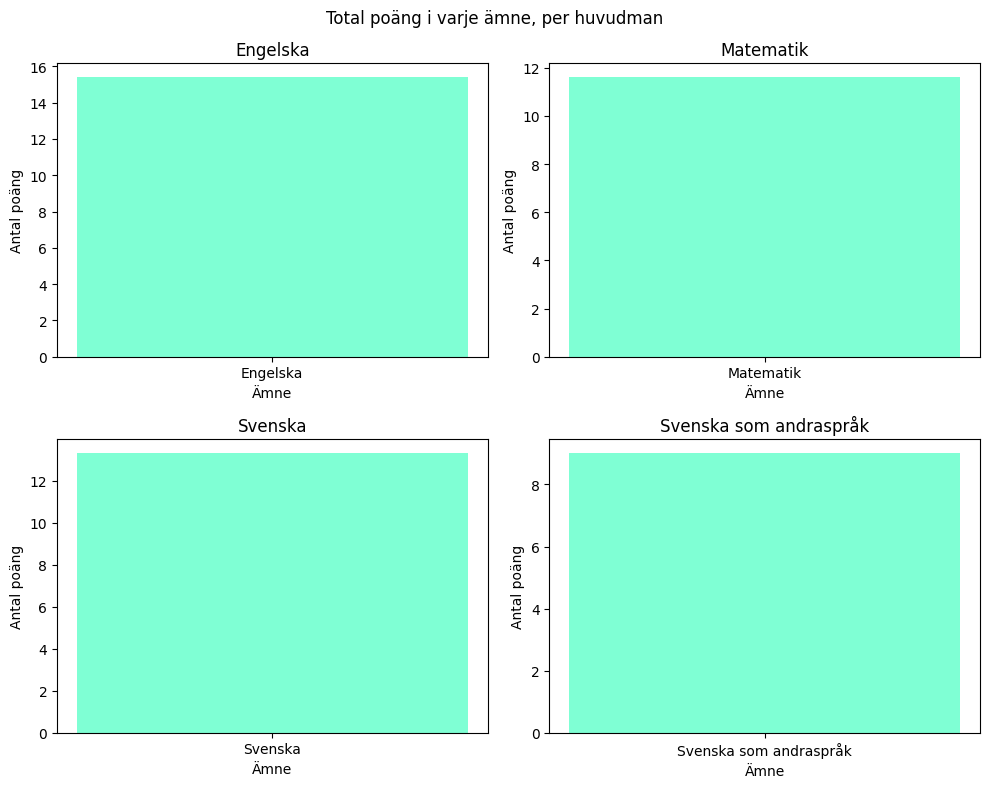

In [ ]:
#Kommunal skola 

# Call the method process_excel_sheet
df_engelska = process_excel_sheet("Engelska")
df_engelska = df_engelska.iloc[2]["Totalt (poäng)"]

df_svenska_som_andraspråk = process_excel_sheet("Svenska som andraspråk")
df_svenska_som_andraspråk = df_svenska_som_andraspråk.iloc[2]["Totalt (poäng)"]

df_svenska = process_excel_sheet("Svenska")  
df_svenska = df_svenska.iloc[2]["Totalt (poäng)"]  

df_matematik = process_excel_sheet ("Matematik")
df_matematik = df_matematik.iloc[2]["Totalt (poäng)"]

   

data_kommunala = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}

data_enskilda = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}
data_Skolverket = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}

data_Samtliga= {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}
x = np.arange(len(data_Skolverket["Kategori"]))  # Positions of the bars
y = [len(data_kommunala), len(data_enskilda), len(data_Samtliga), len(data_Skolverket["Antal"])]  # Heights of the bars




fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Total poäng i varje ämne, per huvudman")

for i, (kategori, antal) in enumerate(zip(data_kommunala["Kategori"], data_kommunala["Antal"])):
    ax = axes[i // 2, i % 2]  # Get current axis
    ax.bar(kategori, antal, color='aquamarine')
    ax.set_title(kategori)
    ax.set_xlabel("Ämne")
    ax.set_ylabel("Antal poäng")

plt.tight_layout()
plt.show()


#Enskild skolverksamhet /Private school

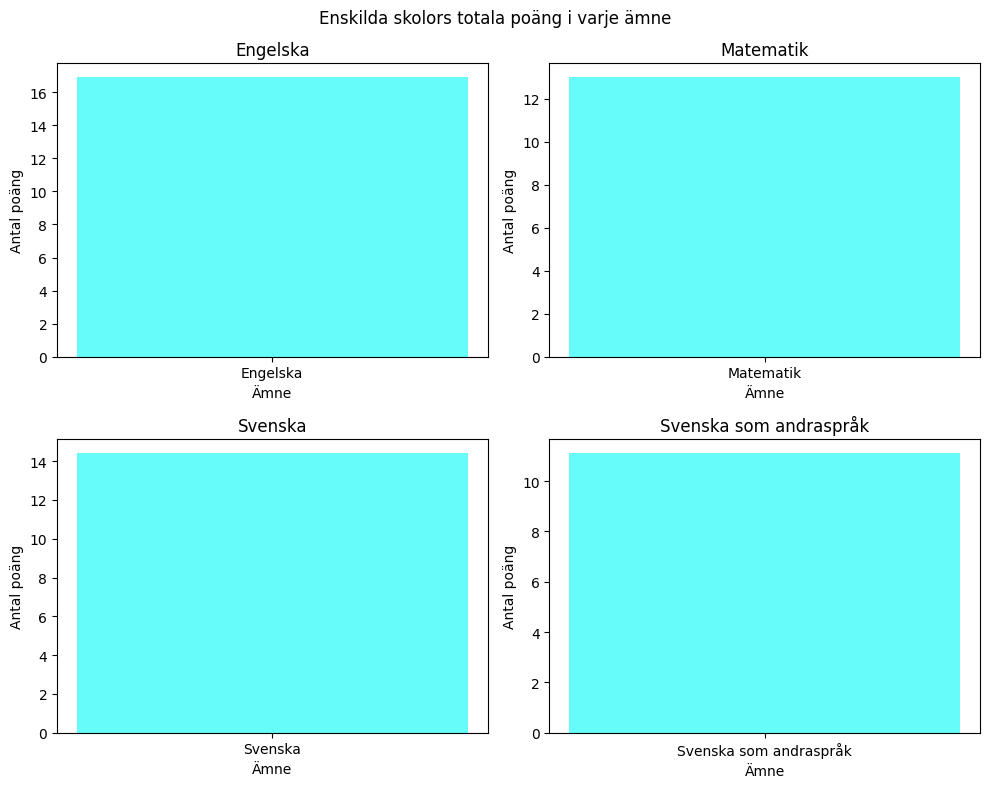

In [ ]:
#Enskild  skolverksamhet

# Call the method process_excel_sheet
df_engelska = process_excel_sheet("Engelska")
df_engelska = df_engelska.iloc[3]["Totalt (poäng)"]

df_svenska_som_andraspråk = process_excel_sheet("Svenska som andraspråk")
df_svenska_som_andraspråk = df_svenska_som_andraspråk.iloc[3]["Totalt (poäng)"]

df_svenska = process_excel_sheet("Svenska")  
df_svenska = df_svenska.iloc[3]["Totalt (poäng)"]  

df_matematik = process_excel_sheet ("Matematik")
df_matematik = df_matematik.iloc[3]["Totalt (poäng)"]  

data_enskilda = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}
x = np.arange(len(data_enskilda["Kategori"]))  # Positions of the bars
y = data_enskilda["Antal"]  # Heights of the bars

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Enskilda skolors totala poäng i varje ämne")

for i, (kategori, antal) in enumerate(zip(data_enskilda["Kategori"], data_enskilda["Antal"])):
    ax = axes[i // 2, i % 2]  # Get current axis
    ax.bar(kategori, antal, color='#65FCFA')
    ax.set_title(kategori)
    ax.set_xlabel("Ämne")
    ax.set_ylabel("Antal poäng")

plt.tight_layout()
plt.show()


Skolverket


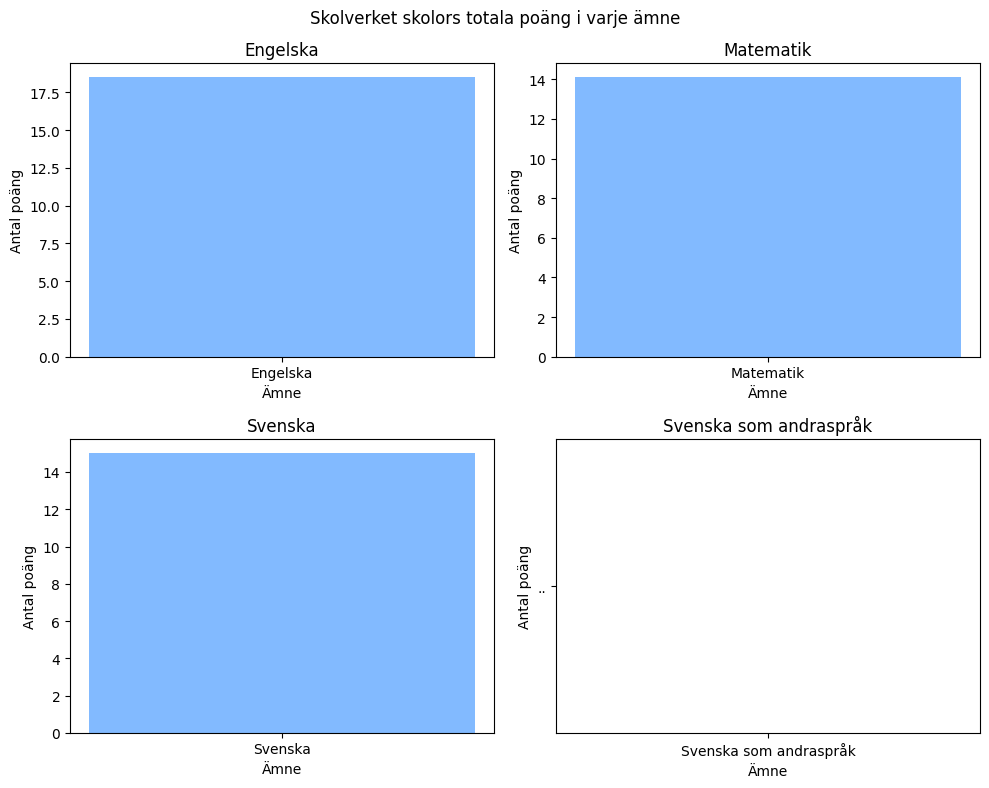

In [ ]:
#Skolverket  skolverksamhet

# Call the method process_excel_sheet
df_engelska = process_excel_sheet("Engelska")
df_engelska = df_engelska.iloc[4]["Totalt (poäng)"]

df_svenska_som_andraspråk = process_excel_sheet("Svenska som andraspråk")
df_svenska_som_andraspråk = df_svenska_som_andraspråk.iloc[4]["Totalt (poäng)"]

df_svenska = process_excel_sheet("Svenska")  
df_svenska = df_svenska.iloc[4]["Totalt (poäng)"]  

df_matematik = process_excel_sheet ("Matematik")
df_matematik = df_matematik.iloc[4]["Totalt (poäng)"]  

data_skolverket = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}
x = np.arange(len(data_skolverket["Kategori"]))  # Positions of the bars
y = data_skolverket["Antal"]  # Heights of the bars

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Skolverket skolors totala poäng i varje ämne")

for i, (kategori, antal) in enumerate(zip(data_skolverket["Kategori"], data_skolverket["Antal"])):
    ax = axes[i // 2, i % 2]  # Get current axis
    ax.bar(kategori, antal, color='#82BAFF')
    ax.set_title(kategori)
    ax.set_xlabel("Ämne")
    ax.set_ylabel("Antal poäng")

plt.tight_layout()
plt.show()


* Rita ett stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

* Draw a bar graph in subplots of the total scores for the different subjects for the different majors.


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U4')) -> None

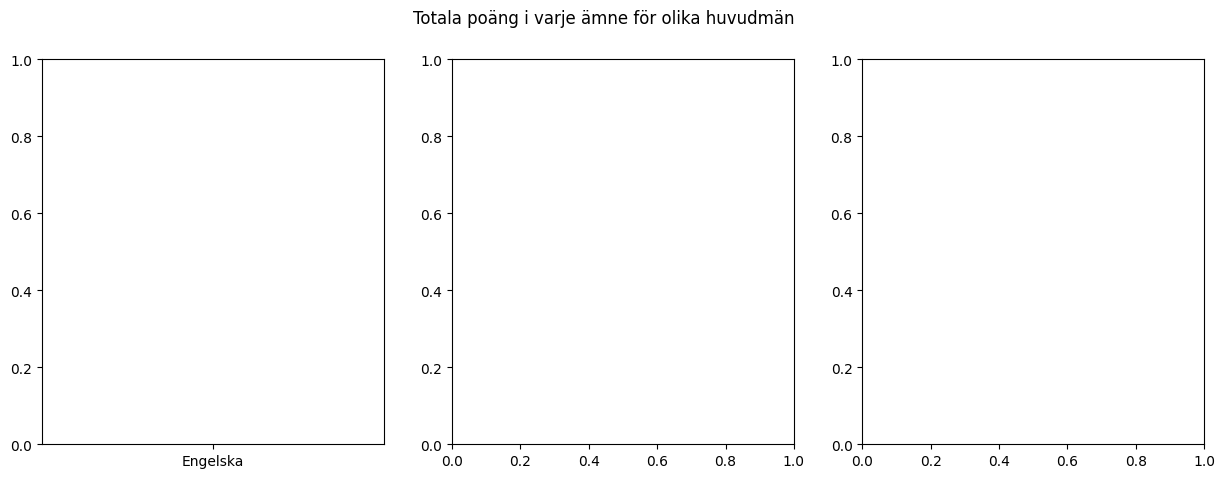

In [ ]:


def generate_combined_barplot(data, titles):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Totala poäng i varje ämne för olika huvudmän")

    for i, (huvudman, title) in enumerate(zip(data, titles)):
        ax = axes[i]  # Get current axis
        ax.bar(data[huvudman]["Kategori"], data[huvudman]["Antal"], color='aquamarine')
        ax.set_title(title)
        ax.set_xlabel("Ämne")
        ax.set_ylabel("Antal poäng")

    plt.tight_layout()
    plt.show()

# Data för varje huvudman
data_kommunala = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}

data_enskilda = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}

data_skolverket = {
    "Kategori": ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"],
    "Antal": [df_engelska, df_matematik, df_svenska, df_svenska_som_andraspråk]
}

# Titles for  subplot
titles = ["Kommunala skolor", "Enskilda skolor", "Skolverket"]

# Generera den kombinerade subploten
generate_combined_barplot({"Kommunala": data_kommunala, "Enskilda": data_enskilda, "Skolverket": data_skolverket}, titles)
